<a href="https://colab.research.google.com/github/nmodem2k/image_compression/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# image compression using kmeans

dimension of image will be same but size will be minimmized

In [0]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

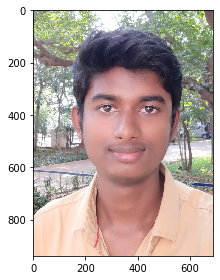

In [20]:
image=io.imread('profile.png')
io.imshow(image)

In [21]:
print(image.shape)                      

(939, 688, 3)


In [0]:
height=image.shape[0]
width=image.shape[1]

In [0]:
image=image.reshape(image.shape[0]*image.shape[1],3)     # flattening to 939*688,3

In [24]:
image.shape

(646032, 3)

In [0]:
kmeans=KMeans(n_clusters=64,max_iter=200,verbose=1,n_init=1)

In [26]:
kmeans.fit(image)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 74877967.48341876
start iteration
done sorting
end inner loop
Iteration 1, inertia 71476073.42364728
start iteration
done sorting
end inner loop
Iteration 2, inertia 70448221.33404398
start iteration
done sorting
end inner loop
Iteration 3, inertia 69829495.40346475
start iteration
done sorting
end inner loop
Iteration 4, inertia 69377542.60572721
start iteration
done sorting
end inner loop
Iteration 5, inertia 69036297.70976494
start iteration
done sorting
end inner loop
Iteration 6, inertia 68722034.48457411
start iteration
done sorting
end inner loop
Iteration 7, inertia 68465364.14711377
start iteration
done sorting
end inner loop
Iteration 8, inertia 68229457.37128976
start iteration
done sorting
end inner loop
Iteration 9, inertia 67997038.69705841
start iteration
done sorting
end inner loop
Iteration 10, inertia 67740853.81614573
start iteration
done sorting
end inner loop
Iteration 11, iner

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=64, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [27]:
print(kmeans.cluster_centers_)

[[176.15594148 129.84893541 130.55501368]
 [252.18534456 214.54362332 191.77461802]
 [ 66.74012332  44.0550354   51.187029  ]
 [113.6828171   98.73974736  99.56506316]
 [161.74445618 166.96854729 162.21187208]
 [251.89657435 252.7039419  251.6163976 ]
 [221.02874755 165.40471252 157.76160848]
 [189.23688755 195.44323333 193.545327  ]
 [135.61001362 144.94870572 138.54938692]
 [ 27.35172906  26.53198001  42.87228399]
 [162.58080204 104.25320896  99.72813521]
 [136.22673398 163.02194908  94.51777875]
 [220.68682611 221.4652029  221.86610469]
 [241.57600823 204.52512743 184.03201288]
 [193.02647271 144.36576895 143.36956949]
 [181.79859628 206.88953311 129.78761062]
 [110.71846943  72.70799487  75.21953826]
 [253.10526821 224.89727473 208.20190001]
 [ 54.52289276  53.11082315  71.19104036]
 [122.90947655 130.19953034 125.03030073]
 [ 94.48122909  89.43910296  87.16515921]
 [207.57673214 205.47600547 207.70285632]
 [151.75710798 154.36688685 147.04092476]
 [ 78.4131639   78.58145976  99.47

In [28]:
type(kmeans.cluster_centers_)

numpy.ndarray

In [0]:
clusters=np.asarray(kmeans.cluster_centers_)

In [0]:
labels=np.asarray(kmeans.labels_)

In [0]:
labels=labels.reshape(height,width)

In [0]:
np.save('codebook.npy',clusters)

In [36]:
io.imsave('compressed_profile.png',labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: compressed_profile.png is a low contrast image
  """Entry point for launching an IPython kernel.


In [0]:
image=np.zeros((height,width,3))

In [0]:
for i in range(height):
  for j in range(width):
    image[i,j,:]=clusters[labels[i,j],:]

In [41]:
io.imsave('reconstructed_img.png',image)